In [49]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

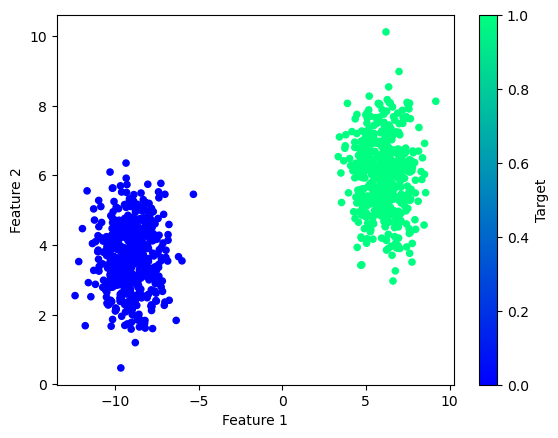

In [5]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [15]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9613
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9627
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9653
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9653
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9693
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1842 - accuracy: 0.9720
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 0.9720
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9720
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1723 - accuracy: 0.9747
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9747
Epoch 11/

<Axes: >

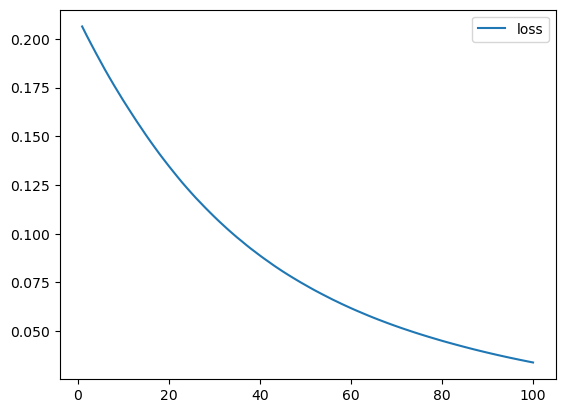

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<Axes: >

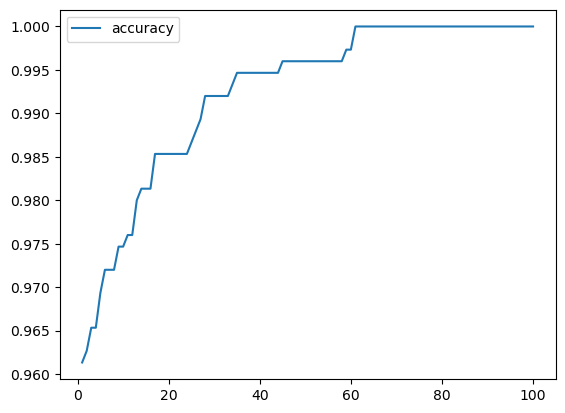

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0338 - accuracy: 1.0000 - 101ms/epoch - 13ms/step
Loss: 0.03375129774212837, Accuracy: 1.0


In [ ]:
###NEW DATA SET###

In [23]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 76ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [24]:
###NEW DATASET###

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

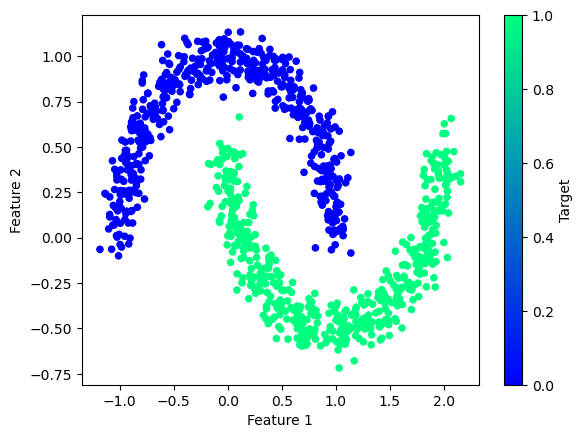

In [65]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [70]:
# gfg = pd.Series(df_moons["Feature 1"])
# gfg.plot()
# plt.show()

In [26]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [27]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.4728 - accuracy: 0.4320
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2901 - accuracy: 0.4573
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1699 - accuracy: 0.4800
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0887 - accuracy: 0.4880
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0252 - accuracy: 0.5027
Epoch 6/100
24/24 [==============================] - 0s 988us/step - loss: 0.9715 - accuracy: 0.5160
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9242 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8804 - accuracy: 0.5427
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8402 - accuracy: 0.5493
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8030 - accuracy: 0.5613
Epoch 1

<Axes: >

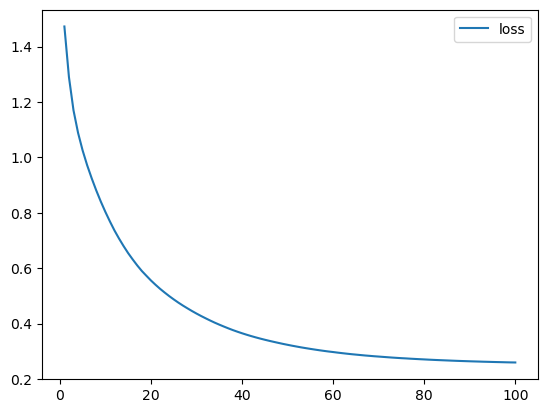

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<Axes: >

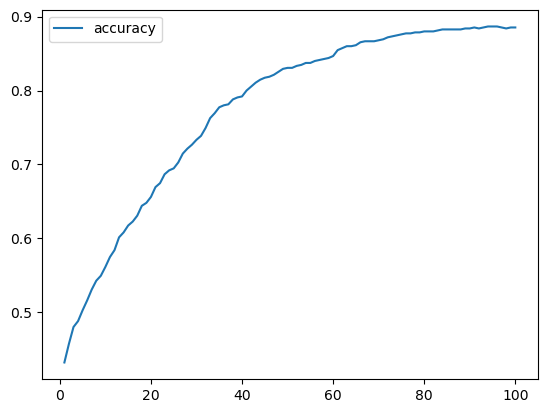

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [30]:
###NEW MODEL###

In [31]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [32]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [33]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7988 - accuracy: 0.6760
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7557 - accuracy: 0.7000
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.7200
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.7413
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.7573
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.7680
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7693
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7827
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7907
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7987
Epoch 11/

In [71]:
###NEW MODEL###

In [72]:
# Generate our new Sequential model
third_model = tf.keras.models.Sequential()

In [73]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 4

third_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

third_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
third_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [74]:
# Compile the Sequential model together and customize metrics
third_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
third_fit_model = third_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7892 - accuracy: 0.1987
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7526 - accuracy: 0.2907
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7223 - accuracy: 0.4240
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.5653
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6653
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.7280
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.7653
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.7867
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7800
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7867
Epoch 11/